In [2]:
import tensorflow as tf

In [1]:
PREPROC_TRAIN_DATA = False

In [8]:

import tensorflow as tf    

def largeKernelDenoiser():
    inputs = tf.keras.layers.Input(shape=(360, 512, 2))
    # apply 31x31 kernels, with stride 2 and batch normalization before the relu activation
    x = tf.keras.layers.Conv2D(64, (31, 31), strides=(2, 2), padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    # apply 31x31 kernels, with stride 2 and batch normalization before the relu activation
    x = tf.keras.layers.Conv2D(64, (31, 31), strides=(2, 2), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    # apply 31x31 kernels, with stride 2 and batch normalization before the relu activation
    x = tf.keras.layers.Conv2D(64, (31, 31), strides=(2, 2), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv2D(64, (31, 31), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv2D(64, (31, 31), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Conv2D(64, (31, 31), strides=(1, 1), padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    # flatten the output
    x = tf.keras.layers.Flatten()(x)
    # apply a dense layer with 1024 units and batch normalization before the relu activation
    x = tf.keras.layers.Dense(512, activation=None)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    
    x = tf.keras.layers.Dense(1, activation=None)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    # apply a sigmoid activation
    x = tf.keras.layers.Activation('sigmoid')(x)
    
    
    largeKernelDenoiser = tf.keras.models.Model(inputs=inputs, outputs=x)
    return largeKernelDenoiser

def create_model():
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False,
        weights=None,
        input_shape=(180, 256, 2),
        pooling=None,
        classes=1,
        classifier_activation='sigmoid'
    )
    return base_model

    inputs = tf.keras.layers.Input(shape=(360, 512, 2))
    x = largeKernelDenoiser()(inputs)
    x = base_model(x)
    model = tf.keras.models.Model(inputs=inputs, outputs=x)
    return model
    
    # 
    
    return model

model = largeKernelDenoiser()
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 360, 512, 2)]     0         
                                                                 
 conv2d_34 (Conv2D)          (None, 180, 256, 64)      123072    
                                                                 
 batch_normalization_41 (Bat  (None, 180, 256, 64)     256       
 chNormalization)                                                
                                                                 
 re_lu_38 (ReLU)             (None, 180, 256, 64)      0         
                                                                 
 conv2d_35 (Conv2D)          (None, 90, 128, 64)       3936320   
                                                                 
 batch_normalization_42 (Bat  (None, 90, 128, 64)      256       
 chNormalization)                                          

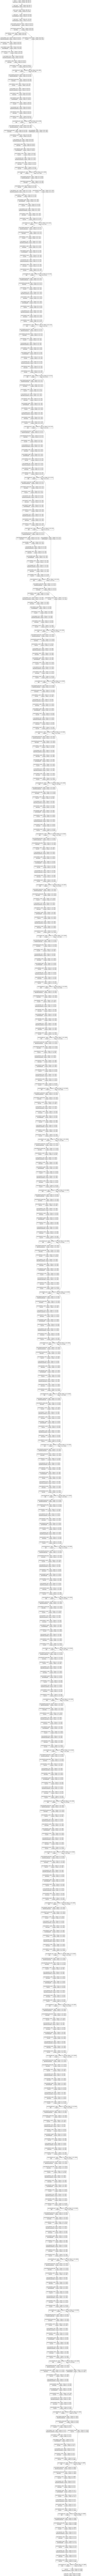

In [2]:
# plot model
tf.keras.utils.plot_model(model, show_shapes=True, dpi=64)

1/1 [==============================] - 2s 2s/step
[[0.4714094]] (1, 1)


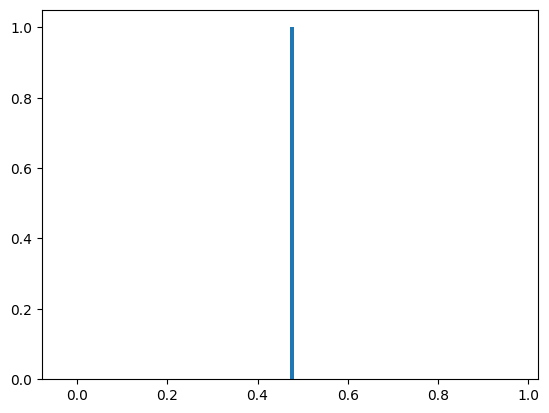

In [147]:


x = np.random.randn(360, 256, 2)
x = np.expand_dims(x, axis=0)
# x = x - np.min(x)
# x = 2 * x / np.max(x) - 1
# y = model.layers[0](x)
# y = model.layers[1](y)
# y = model.layers[2](y)
# y = model.layers[3](y)
# y = model.layers[4](y)
# y = model.layers[5](y)
# print(model.layers[5].name)
# y = model.layers[6](y)
# print(model.layers[6].name)
# # y = model.layers[3](y)
# # y = model.layers[4](y)
# # y = model.layers[5](y)
y = model.predict(x)
print(y, y.shape)
import matplotlib.pyplot as plt
plt.hist(y.flatten(), bins=100);
# plt.ylim(0, 100)

/tmp/ipykernel_157382/2256530468.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.hist(np.array(model.layers[-1].get_weights()), bins=30);


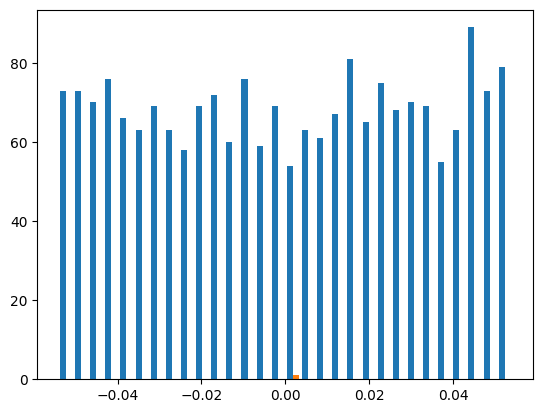

: 

In [150]:
plt.hist(np.array(model.layers[-1].get_weights()), bins=30);